In [168]:
import numpy as np
import cv2
import sys
from PIL import Image
from scipy import ndimage
from scipy import misc
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
from tensorflow.contrib.util import make_ndarray

In [151]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [147]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')



In [148]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


In [181]:
saver = tf.train.Saver()

sess = tf.InteractiveSession()

saver.restore(sess, './cnn.ckpt')




In [121]:
img = cv2.imread('some_image.jpg', 0)
img.shape
img

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 255, 255, ..., 255, 255, 128],
       [128, 255, 255, ..., 255, 255, 128],
       ..., 
       [128, 255, 255, ..., 255, 255, 128],
       [128, 255, 255, ..., 255, 255, 128],
       [128, 128, 128, ..., 128, 128, 128]], dtype=uint8)

In [111]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


img = Image.open('some_image.jpg')
img3 = img.resize((28,28))
img3.save('some_image_small.png')

(28, 28, 3)


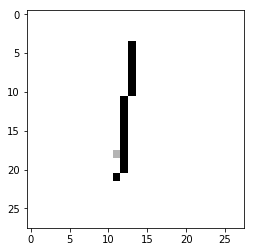

In [120]:
img_small = cv2.imread('some_image_small.png')
# grayscale = rgb2gray(img_small)
print(img_small.shape)
# img_small.reshape(28*28)
plt.imshow(img_small)
plt.show()

In [130]:
print(img_small.shape)
img_small2 = img_small.reshape(28, 28, 1)

(28, 28, 3)


ValueError: cannot reshape array of size 2352 into shape (28,28)

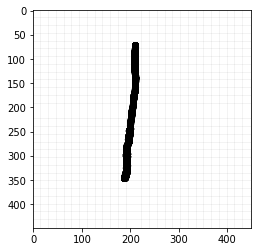

In [95]:
img_small = cv2.imread('some_image.jpg')
plt.imshow(img_small)
plt.show()

In [295]:
contents = ''
with open('/Users/jamesloy/Desktop/Digits_App/some_image.jpg', 'rb') as f:
    contents = f.read()

img = tf.image.decode_png(contents, channels=3)
img = tf.image.resize_images(img, [28, 28])
img = tf.image.rgb_to_grayscale(img)
img = tf.reshape(img, [1, 28*28])


In [296]:
img2 = img.eval()
img2.shape

(1, 784)

In [297]:
feed_dict = {x: img2, y_: mnist.test.labels, keep_prob: 1.0}
# feed_dict = {x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}

print(type(feed_dict))
# classification = y_conv.eval(feed_dict)
predictions = sess.run([tf.nn.softmax(y_conv)], feed_dict)


<class 'dict'>


In [298]:
print(predictions[0][0])

[  1.00000000e+00   0.00000000e+00   1.01155255e-22   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
